Initial imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
import math

Gaussian

In [2]:
def estimate_gaussian(X):
    #Forma 1
    n = np.size(X, 1)
    m = np.size(X, 0)
    mu = np.zeros((n, 1))
    sigma2 = np.zeros((n, 1))
    mu = np.reshape((1/m)*np.sum(X, 0), (1, n))
    sigma2 = np.reshape((1/m)*np.sum(np.power((X - mu),2), 0),(1, n))
    
    #Forma 2
    #mu = np.zeros((n, 1))
    #mu = np.mean(X, axis=0)
    #mu = mu.T
    #sigma2 = np.zeros((n, 1))
    #sigma2 = np.var(X, axis=0)
    #sigma2 = sigma2.T

    #Forma 3
    #m = X.shape[0]
    ##compute mean
    #sum_ = np.sum(X,axis=0)
    #mu = 1/m *sum_
    # compute variance
    #sigma2 = 1/m * np.sum((X - mu)**2,axis=0)

    return mu, sigma2

Multivariate Gaussian

In [44]:
def multivariateGaussian(X, mu, sigma2):
     n = np.size(sigma2, 1)
     m = np.size(sigma2, 0)
     #print(m,n)
     
     if n == 1 or m == 1:        
         sigma2 = np.diag(sigma2[0, :])
     
     X = X - mu
     pi = math.pi
     det = np.linalg.det(sigma2)
     inv = np.linalg.inv(sigma2)
     val = np.reshape((-0.5)*np.sum(np.multiply((X@inv),X), 1),(np.size(X, 0), 1))
     
     p = np.power(2*pi, -n/2)*np.power(det, -0.5)*np.exp(val)
     
     return p

Reads the initial data 

In [35]:
df = pd.read_csv('../data/dataset_concurso.csv', encoding='ISO-8859-1')
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70710 entries, 0 to 164157
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   ï»¿IdConcurso                  70710 non-null  object 
 1   IdFase                         70710 non-null  object 
 2   Orden                          70710 non-null  int64  
 3   IdEscuela                      70710 non-null  object 
 4   NivelEscolarCode               70710 non-null  int64  
 5   Grado                          70710 non-null  object 
 6   IdEstudiante                   70710 non-null  object 
 7   IdMaratonFaseEstudiante        70710 non-null  object 
 8   SeleccionadoParaSiguienteFase  70710 non-null  int64  
 9   IdMaratonFaseTask              70710 non-null  object 
 10  IsPrueba                       70710 non-null  int64  
 11  Orden.1                        70710 non-null  int64  
 12  IsActivo                       70710 non-null

First we get two samples, one for the real test and another for the practice tests.

Text(0, 0.5, 'Calificacion')

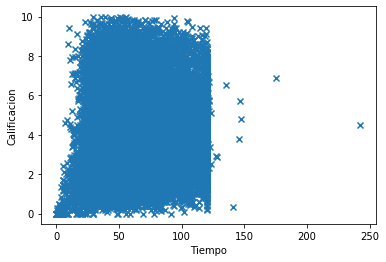

In [40]:
dfExamen = df[['IdEstudiante', 'IdEscuela', 'Grado', 'Calificacion', 'Tiempo', 'IsPrueba']].where(df['IsPrueba']==0)

dfExamen = dfExamen.dropna()
dfExamen.drop_duplicates(keep='first', inplace=True)

plt.scatter(dfExamen['Tiempo'], dfExamen['Calificacion'], marker = 'x')
plt.xlabel('Tiempo')
plt.ylabel('Calificacion')

Let's see the distribution for practices

Text(0, 0.5, 'Calificacion')

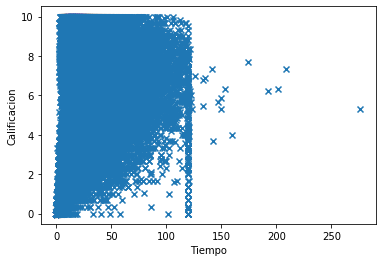

In [41]:
dfPractica= df[['IdEstudiante', 'IdEscuela', 'Grado', 'Calificacion', 'Tiempo', 'IsPrueba']].where(df['IsPrueba']==1)

dfPractica = dfPractica.dropna()
dfPractica.drop_duplicates(keep='first', inplace=True)

plt.scatter(dfPractica['Tiempo'], dfPractica['Calificacion'], marker = 'x')
plt.xlabel('Tiempo')
plt.ylabel('Calificacion')

Find the mean, and the variance for our 2 relevant features: calificacion, tiempo.

In [42]:
X = dfExamen[['Calificacion', 'Tiempo']]
print(X.shape)
X.info()
X = X.dropna()
X.head()

X = X.to_numpy()
print(X.shape)
print(X)


(24126, 2)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 24126 entries, 0 to 164157
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Calificacion  24126 non-null  float64
 1   Tiempo        24126 non-null  float64
dtypes: float64(2)
memory usage: 565.5 KB
(24126, 2)
[[  4.8   66.72]
 [  8.2  120.  ]
 [  4.04  37.53]
 ...
 [  4.    70.47]
 [  5.38  48.05]
 [  5.8   70.27]]


In [43]:
mu, sigma2 = estimate_gaussian(X)
print('mean: ', mu,' variance: ', sigma2)

mean:  [[ 4.5310955  63.65659455]]  variance:  [[  4.36027892 619.49934607]]


Experimentando

array([[1.10462845e-05],
       [1.81688270e-05],
       [2.81714989e-05],
       ...,
       [9.82933650e-47],
       [3.10159885e-48],
       [9.22612743e-50]])

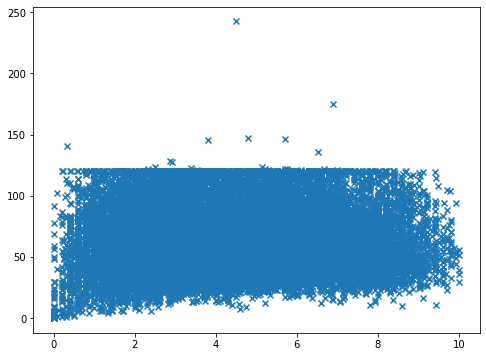

In [82]:
plt.figure(figsize=(8,6))
plt.scatter(X[:,0],X[:,1],marker="x")
X1,X2 = np.meshgrid(np.linspace(0,35,num=70),np.linspace(0,35,num=70))

p2 = multivariateGaussian(np.hstack((X1.flatten()[:,np.newaxis],X2.flatten()[:,np.newaxis])), mu, sigma2)
np.sort(p2)


In [58]:
p = multivariateGaussian(X, mu, sigma2)
print(p.shape)
print(p)

(24126, 1)
[[3.01406087e-03]
 [5.04568309e-05]
 [1.71698628e-03]
 ...
 [2.85577165e-03]
 [2.31621601e-03]
 [2.45768333e-03]]


In [52]:
def selectThreshHold(yval, pval):
    
    F1 = 0
    bestF1 = 0
    bestEpsilon = 0
    
    stepsize = (np.max(pval) - np.min(pval))/1000
        
    epsVec = np.arange(np.min(pval), np.max(pval), stepsize)
    noe = len(epsVec)
    
    for eps in range(noe):
        epsilon = epsVec[eps]
        pred = (pval < epsilon)
        prec, rec = 0,0
        tp,fp,fn = 0,0,0
        
        try:
            for i in range(np.size(pval,0)):
                if pred[i] == 1 and yval[i] == 1:
                    tp+=1
                elif pred[i] == 1 and yval[i] == 0:
                    fp+=1
                elif pred[i] == 0 and yval[i] == 1:
                    fn+=1
            prec = tp/(tp + fp)
            rec = tp/(tp + fn)
            F1 = 2*prec*rec/(prec + rec)
            if F1 > bestF1:
                bestF1 = F1
                bestEpsilon = epsilon
        except ZeroDivisionError:
            print('Warning dividing by zero!!')          
       
    return bestF1, bestEpsilon